In [884]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [885]:
# Train and Test will be initial data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
combine=[train,test]

In [886]:
# Check null data (missing data)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [887]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [888]:
# Drop the feature 'PassengerId'&'Cabin'&'Ticket', define a new dataset train_drop&test_drop
train_drop = train.drop(['PassengerId','Ticket','Cabin'],axis=1)
test_drop = test.drop(['PassengerId','Ticket','Cabin'],axis=1)
combine=[train_drop,test_drop]

In [889]:
train_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [890]:
# Check the correlation of 'Title' with 'Survived', we first need to extract the title from 'Name' feature
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [891]:
train_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [892]:
train_drop.Title.unique()
test_drop.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'], dtype=object)

In [893]:
rare_title = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(rare_title,'Rare')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')

In [894]:
train_drop.Title.unique()==test_drop.Title.unique()
train_drop.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [895]:
titles_mapping={'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title']=dataset.Title.map(titles_mapping)

In [896]:
train_drop.head()
test_drop.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2


In [897]:
# We can drop the 'Name' feature
train_drop = train_drop.drop(['Name'],axis=1)
test_drop = test_drop.drop(['Name'],axis=1)

In [898]:
train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,3
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [899]:
# Convert 'Sex' to 1 and 0
train_drop['Sex'] = train_drop['Sex'].map({'male':0,'female':1}).astype(int)
train_drop[0:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,3
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,2
9,1,2,1,14.0,1,0,30.0708,C,2


In [900]:
test_drop['Sex'] = test_drop['Sex'].map({'male':0,'female':1}).astype(int)
test_drop[0:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,2
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,2
5,3,0,14.0,0,0,9.2250,S,1
6,3,1,30.0,0,0,7.6292,Q,3
7,2,0,26.0,1,1,29.0000,S,1
8,3,1,18.0,0,0,7.2292,C,2
9,3,0,21.0,2,0,24.1500,S,1


In [901]:
combine=[train_drop,test_drop]

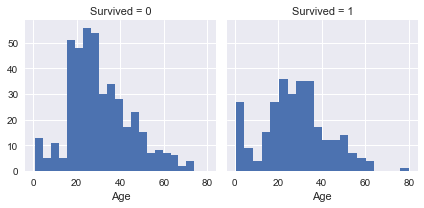

In [902]:
# We can find that 'Age' and 'Embark' has some correlations with 'Survived', so we'd like to fill those NA values:
hist1=sns.FacetGrid(train_drop,col='Survived')
hist1.map(plt.hist,'Age',bins=20)
plt.show()

<function matplotlib.pyplot.show>

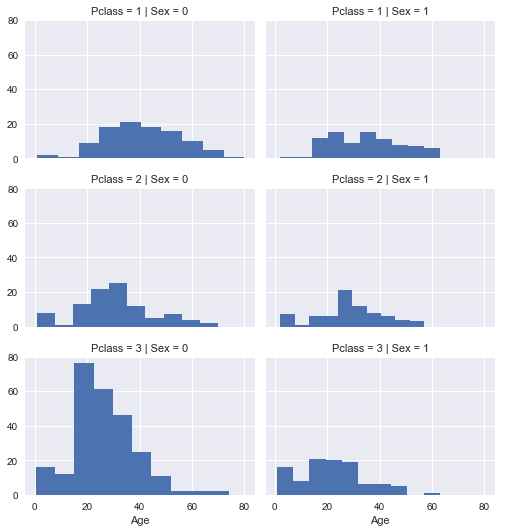

In [903]:
hist2=sns.FacetGrid(train_drop,col='Sex',row='Pclass',size=2.5,aspect=1.4)
hist2.map(plt.hist,'Age')
hist2.add_legend()
plt.show

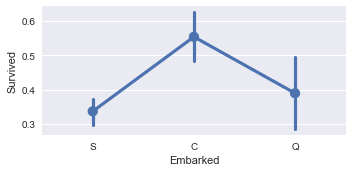

In [904]:
hist1=sns.FacetGrid(train_drop,size=2.5,aspect=2)
hist1.map(sns.pointplot,'Embarked','Survived')
plt.show()

In [905]:
# Let's infer the 'Age' with 'Pclass' and 'Age' median and 'Embarked' with the mode
age_guess=np.zeros([3,2])
age_guess

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [906]:
for dataset in combine:
    for i in range(0,3):
        for j in range(0,2):
            age_guess[i,j]=int(train_drop[(train_drop['Pclass']==i+1)&
                                          (train_drop['Sex']==j)]['Age'].dropna().median())
    for i in range(0,3):
        for j in range(0,2):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==j)&(dataset.Pclass==i+1),'Age']=age_guess[i,j]

In [907]:
age_guess

array([[ 40.,  35.],
       [ 30.,  28.],
       [ 25.,  21.]])

In [908]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


In [909]:
train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,3
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1


In [910]:
test_drop.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,2
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,2


In [911]:
for dataset in combine:
    guess_embark = dataset.Embarked.dropna().mode()[0]
    dataset['Embarked']=dataset['Embarked'].fillna(guess_embark)

In [912]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


In [913]:
train_drop.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [914]:
train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,3
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1


In [915]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':1,'C':2,'Q':3})

In [916]:
train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,1,3
3,1,1,1,35.0,1,0,53.1000,1,2
4,0,3,0,35.0,0,0,8.0500,1,1


In [917]:
test_drop.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,3,1
1,3,1,47.0,1,0,7.0000,1,2
2,2,0,62.0,0,0,9.6875,3,1
3,3,0,27.0,0,0,8.6625,1,1
4,3,1,22.0,1,1,12.2875,1,2


In [918]:
# Add FamilyNumber feature based on 'SibSp' and 'Parch'
for dataset in combine:
    dataset['FamilyNumber']=dataset['SibSp']+dataset['Parch']

train_drop=train_drop.drop(['Parch','SibSp'],axis=1)
test_drop=test_drop.drop(['Parch','SibSp'],axis=1)
combine=[train_drop,test_drop]

In [919]:
train_drop.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyNumber
0,0,3,0,22.0,7.2500,1,1,1
1,1,1,1,38.0,71.2833,2,2,1
2,1,3,1,26.0,7.9250,1,3,0
3,1,1,1,35.0,53.1000,1,2,1
4,0,3,0,35.0,8.0500,1,1,0


In [920]:
empty = [0]*891

In [970]:
train_one_hot=pd.DataFrame({'Male':1*(train_drop['Sex']==0),'Female':1*(train_drop['Sex']==1),
                      'EmbarkedC':1*(train_drop['Embarked']==2),'EmbarkedS':1*(train_drop['Embarked']==1),
                      'EmbarkedQ':1*(train_drop['Embarked']==3),
                      'Pclass1':1*(train_drop['Pclass']==1),'Pclass2':1*(train_drop['Pclass']==2),
                      'Pclass3':1*(train_drop['Pclass']==3),
                      'Mr':1*(train_drop['Title']==1), 'Mrs':1*(train_drop['Title']==2), 
                      'Miss':1*(train_drop['Title']==3), 'Master':1*(train_drop['Title']==4), 
                      'Rare':1*(train_drop['Title']==5)
                     })

In [971]:
train_one_hot.head()

,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,1,1,0,0,1,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,0


In [972]:
test_one_hot=pd.DataFrame({'Male':1*(test_drop['Sex']==0),'Female':1*(test_drop['Sex']==1),
                      'EmbarkedC':1*(test_drop['Embarked']==2),'EmbarkedS':1*(test_drop['Embarked']==1),
                      'EmbarkedQ':1*(test_drop['Embarked']==3),
                      'Pclass1':1*(test_drop['Pclass']==1),'Pclass2':1*(test_drop['Pclass']==2),
                      'Pclass3':1*(test_drop['Pclass']==3),
                      'Mr':1*(test_drop['Title']==1), 'Mrs':1*(test_drop['Title']==2), 
                      'Miss':1*(test_drop['Title']==3), 'Master':1*(test_drop['Title']==4), 
                      'Rare':1*(test_drop['Title']==5)
                     })

In [973]:
test_one_hot.head()

,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,1,0,0,1,0


In [974]:
train_drop_clean=train_drop.join(train_one_hot)
train_drop_clean.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyNumber,EmbarkedC,EmbarkedQ,...,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0,3,0,22.0,7.2500,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,1,1,38.0,71.2833,2,2,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2,1,3,1,26.0,7.9250,1,3,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,35.0,53.1000,1,2,1,0,0,...,1,0,0,0,0,1,1,0,0,0
4,0,3,0,35.0,8.0500,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [975]:
train_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
Fare            891 non-null float64
Embarked        891 non-null int64
Title           891 non-null int64
FamilyNumber    891 non-null int64
EmbarkedC       891 non-null int64
EmbarkedQ       891 non-null int64
EmbarkedS       891 non-null int64
Female          891 non-null int64
Male            891 non-null int64
Master          891 non-null int64
Miss            891 non-null int64
Mr              891 non-null int64
Mrs             891 non-null int64
Pclass1         891 non-null int64
Pclass2         891 non-null int64
Pclass3         891 non-null int64
Rare            891 non-null int64
dtypes: float64(2), int64(19)
memory usage: 146.3 KB


In [976]:
test_drop_clean=test_drop.join(test_one_hot)
test_drop_clean.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyNumber,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,3,0,34.5,7.8292,3,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,3,1,47.0,7.0000,1,2,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,2,0,62.0,9.6875,3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,3,0,27.0,8.6625,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,3,1,22.0,12.2875,1,2,2,0,0,1,1,0,0,0,0,1,0,0,1,0


In [977]:
test_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
Pclass          418 non-null int64
Sex             418 non-null int64
Age             418 non-null float64
Fare            417 non-null float64
Embarked        418 non-null int64
Title           418 non-null int64
FamilyNumber    418 non-null int64
EmbarkedC       418 non-null int64
EmbarkedQ       418 non-null int64
EmbarkedS       418 non-null int64
Female          418 non-null int64
Male            418 non-null int64
Master          418 non-null int64
Miss            418 non-null int64
Mr              418 non-null int64
Mrs             418 non-null int64
Pclass1         418 non-null int64
Pclass2         418 non-null int64
Pclass3         418 non-null int64
Rare            418 non-null int64
dtypes: float64(2), int64(18)
memory usage: 65.4 KB


In [978]:
train_drop_clean=train_drop_clean.drop(['Sex','Embarked','Pclass','Title'],axis=1)
test_drop_clean=test_drop_clean.drop(['Sex','Embarked','Pclass','Title'],axis=1)

In [979]:
train_drop_clean.head()

,Survived,Age,Fare,FamilyNumber,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0,22.0,7.2500,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,38.0,71.2833,1,1,0,0,1,0,0,0,0,1,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,1,0,0,1,0,0,0,0,1,0
3,1,35.0,53.1000,1,0,0,1,1,0,0,0,0,1,1,0,0,0
4,0,35.0,8.0500,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [1013]:
# Data scaling to a range of 0~1
train_drop_clean['Age']=(train_drop_clean['Age']-min(train_drop_clean['Age']))/(max(train_drop_clean['Age'])-min(train_drop_clean['Age']))

In [1014]:
train_drop_clean['Fare']=(train_drop_clean['Fare']-min(train_drop_clean['Fare']))/(max(train_drop_clean['Fare'])-min(train_drop_clean['Fare']))

In [1015]:
train_drop_clean['FamilyNumber']=(train_drop_clean['FamilyNumber']-min(train_drop_clean['FamilyNumber']))/(max(train_drop_clean['FamilyNumber'])-min(train_drop_clean['FamilyNumber']))

In [1016]:
test_drop_clean['Age']=(test_drop_clean['Age']-min(test_drop_clean['Age']))/(max(test_drop_clean['Age'])-min(test_drop_clean['Age']))

In [1017]:
test_drop_clean['Fare']=(test_drop_clean['Fare']-min(test_drop_clean['Fare']))/(max(test_drop_clean['Fare'])-min(test_drop_clean['Fare']))

In [1018]:
test_drop_clean['FamilyNumber']=(test_drop_clean['FamilyNumber']-min(test_drop_clean['FamilyNumber']))/(max(test_drop_clean['FamilyNumber'])-min(test_drop_clean['FamilyNumber']))

In [1019]:
train_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived        891 non-null int64
Age             891 non-null float64
Fare            891 non-null float64
FamilyNumber    891 non-null float64
EmbarkedC       891 non-null int64
EmbarkedQ       891 non-null int64
EmbarkedS       891 non-null int64
Female          891 non-null int64
Male            891 non-null int64
Master          891 non-null int64
Miss            891 non-null int64
Mr              891 non-null int64
Mrs             891 non-null int64
Pclass1         891 non-null int64
Pclass2         891 non-null int64
Pclass3         891 non-null int64
Rare            891 non-null int64
dtypes: float64(3), int64(14)
memory usage: 118.4 KB


In [1020]:
# Build predict model
#1) For reproducable result, set a seed
np.random.seed(422)
weights = np.random.normal(loc=0,scale=4,size=17)
weights = np.asmatrix(weights).transpose()
weights.shape
# This is just a trial weights

(17, 1)

In [1021]:
# Get features matrix and label matrix
features_matrix = train_drop_clean.as_matrix(train_drop_clean.columns.values[1:])
labels_matrix = train_drop_clean.as_matrix(['Survived'])

In [1022]:
# generate X=1 vector for theta0
# Only run one time
features_matrix = np.hstack((np.ones([891,1]),features_matrix))

In [1023]:
features_matrix[0:3]
#features_matrix.shape

array([[ 1.        ,  0.27117366,  0.01415106,  0.1       ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.4722292 ,  0.13913574,  0.1       ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.32143755,  0.01546857,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ]])

In [1024]:
labels_matrix[0:5] 

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [1025]:
train_drop_clean.head()

,Survived,Age,Fare,FamilyNumber,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,1,1,0,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0
3,1,0.434531,0.103644,0.1,0,0,1,1,0,0,0,0,1,1,0,0,0
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [1026]:
# Sigmoid
def sigmoid(weights,x):
    h_theta_x = 1/(1+np.exp(-x*weights))
    return h_theta_x

In [1027]:
# check sigmoid function
np.random.seed(4)
# check_w = np.asmatrix(np.random.normal(loc=0,scale=4,size=2)).transpose()
check_w = np.asmatrix([[1],[-1]])
print(check_w)
check_x = np.matrix([[1,2],[2,1]])
print(check_x)
sigmoid(weights = check_w,x = check_x)

[[ 1]
 [-1]]
[[1 2]
 [2 1]]


matrix([[ 0.26894142],
        [ 0.73105858]])

In [1028]:
def RegCostFunction(x,y,weights,reg_lambda):
    [m,n]=x.shape
    h_theta_x = sigmoid(weights,x)
    J_theta = -(np.multiply(y,np.log(h_theta_x).astype(float)).sum()+np.multiply(1-y,np.log(1-h_theta_x).astype(float)).sum())/m\
    +reg_lambda/(2*m)*np.multiply(weights[1:],weights[1:]).sum()
    return J_theta

In [1029]:
# Check RegCostFunction
check_y = np.matrix([[1],[0]])
RegCostFunction(check_x,check_y,check_w,0)

1.3132616875182228

In [1030]:
def GradientDescent(x,y,weights,reg_lambda,alpha):
    [n,v]=weights.shape
    [m,n]=x.shape
    gradient = np.zeros([n,v])
    gradient[0] = (sigmoid(weights,x)-y).sum()/m
    for i in range(1,n):
        gradient[i]=np.multiply(sigmoid(weights,x)-y,x[:,i]).sum()/m + (reg_lambda/m)*weights[i]
    weights = weights-alpha*gradient
    return weights

In [1031]:
# Check GradientDescent function
GradientDescent(features_matrix,labels_matrix,weights,0,0.5)

matrix([[ -2.68487835],
        [ 18.29530569],
        [  6.34139451],
        [  2.83600263],
        [ 12.63034177],
        [  7.68493278],
        [ 49.01477446],
        [ 25.48256811],
        [ 45.19059547],
        [  7.53714059],
        [ 11.51480886],
        [ 38.53221618],
        [  6.63408893],
        [ 23.15802822],
        [  7.85749127],
        [ 24.90857993],
        [ -1.67350343]])

In [1037]:
# Parameters setting
np.random.seed(423)
x = features_matrix[0:891]
y = labels_matrix[0:891]
x_cv = features_matrix[600:]
y_cv = labels_matrix[600:]
reg_lambda = [0,0.003,0.01,0.03,0.1,0.3,1,3]
iteration = 100
alpha = 0.005
weights = np.matrix(np.random.normal(loc=0,scale=3,size=17)).transpose()
weights

matrix([[ 0.84027962],
        [-6.27339168],
        [ 0.14374708],
        [ 2.32924095],
        [-3.49005442],
        [ 5.48362751],
        [ 1.48994665],
        [-4.35092183],
        [ 3.11373617],
        [-1.61944266],
        [-1.10233901],
        [ 7.93118453],
        [-0.14309778],
        [ 0.87476928],
        [ 0.77554538],
        [-2.91256276],
        [ 4.03896998]])

In [1038]:
# Data reservation
cost=[]

In [1039]:
for i in range(0,iteration):
    J = RegCostFunction(x,y,weights,reg_lambda[0])
    cost.append(J)
    weights = GradientDescent(x,y,weights,reg_lambda[0],alpha)

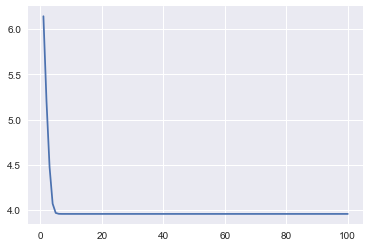

In [1040]:
iter_step = list(range(1,iteration+1))
plt.figure()
plt.plot(iter_step,cost)

In [1041]:
cost[-1]

3.9558619197368134

In [1042]:
weights

matrix([[ 0.83661492],
        [-7.44970646],
        [-0.06150173],
        [ 2.03386545],
        [-4.10572544],
        [ 5.20144496],
        [-0.87745501],
        [-5.50164028],
        [ 0.99919939],
        [-1.766031  ],
        [-1.78031008],
        [ 6.03653026],
        [-0.60485105],
        [ 0.08319225],
        [ 0.10123902],
        [-4.71193461],
        [ 3.95468168]])

In [1043]:
cv_cost=[]
train_cost=[]
weights_series=[]

In [1044]:
for trial_lambda in reg_lambda:
    for i in range(0,iteration):
        J = RegCostFunction(x,y,weights,trial_lambda)
        weights = GradientDescent(x,y,weights,trial_lambda,alpha)
    train_cost.append(J)

#    J_cv = RegCostFunction(x_cv,y_cv,weights,trial_lambda)
#    cv_cost.append(J_cv)
    weights_series.append(weights)

In [1045]:
train_cost

[3.9558619197368134,
 3.9562201791458387,
 3.9570497550715853,
 3.9594168395879779,
 3.9677110204475383,
 3.9913675558122614,
 4.074151659017808,
 4.3092898200616583]

In [1046]:
model_weight = weights_series[0]
model_weight

matrix([[ 0.83661492],
        [-7.44970646],
        [-0.06150173],
        [ 2.03386545],
        [-4.10572544],
        [ 5.20144496],
        [-0.87745501],
        [-5.50164028],
        [ 0.99919939],
        [-1.766031  ],
        [-1.78031008],
        [ 6.03653026],
        [-0.60485105],
        [ 0.08319225],
        [ 0.10123902],
        [-4.71193461],
        [ 3.95468168]])

In [1048]:
# Find the threshold of probability to decide dead or alive
threshold_series = [0.17,0.18,0.2,0.21,0.22,0.23,0.24,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,1]
F_series = []
tp_series = []
fp_series= []
fn_series = []
right_series = []
pre_prob = sigmoid(model_weight,features_matrix)
for threshold in threshold_series:   
    tp = sum((((pre_prob>=threshold)*1+labels_matrix)==2)*1)
    tp_series.append(tp)
    fp = sum(((pre_prob>=threshold)*1>labels_matrix)*1)
    fp_series.append(fp)
    fn = sum(((pre_prob>=threshold)*1<labels_matrix)*1)
    fn_series.append(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F_score = 2*precision*recall/(precision+recall)
    F_series.append(F_score)
    right = sum(((pre_prob>=threshold)*1==labels_matrix)*1)
    right_series.append(right)

right_series

/Users/yisongdong/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


[matrix([[240]]),
 matrix([[242]]),
 matrix([[244]]),
 matrix([[245]]),
 matrix([[245]]),
 matrix([[248]]),
 matrix([[247]]),
 matrix([[259]]),
 matrix([[270]]),
 matrix([[323]]),
 matrix([[365]]),
 matrix([[398]]),
 matrix([[413]]),
 matrix([[436]]),
 matrix([[452]]),
 matrix([[463]]),
 matrix([[490]]),
 matrix([[549]])]

In [1049]:
F_series

[matrix([[ 0.21090909]]),
 matrix([[ 0.21142163]]),
 matrix([[ 0.21193666]]),
 matrix([[ 0.20833333]]),
 matrix([[ 0.20833333]]),
 matrix([[ 0.20910209]]),
 matrix([[ 0.20689655]]),
 matrix([[ 0.20603015]]),
 matrix([[ 0.18181818]]),
 matrix([[ 0.15727003]]),
 matrix([[ 0.1516129]]),
 matrix([[ 0.13660245]]),
 matrix([[ 0.13090909]]),
 matrix([[ 0.12331407]]),
 matrix([[ 0.10953347]]),
 matrix([[ 0.08547009]]),
 matrix([[ 0.0243309]]),
 matrix([[ nan]])]

In [1050]:
max(pre_prob)

matrix([[ 0.99938388]])

(array([ 388.,   24.,   25.,   37.,   85.,   54.,   49.,   21.,   31.,  177.]),
 array([  1.43553435e-08,   9.99384012e-02,   1.99876788e-01,
          2.99815175e-01,   3.99753562e-01,   4.99691948e-01,
          5.99630335e-01,   6.99568722e-01,   7.99507109e-01,
          8.99445496e-01,   9.99383883e-01]),
 <a list of 10 Patch objects>)

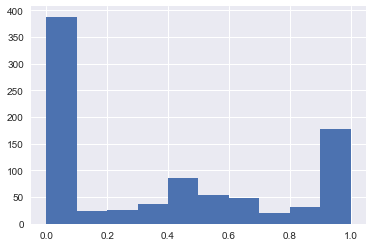

In [962]:
plt.hist(pre_prob)

In [963]:
test_drop_clean[0:10]

,Age,Fare,FamilyNumber,EmbarkedC,EmbarkedQ,EmbarkedS,Female,Male,Master,Miss,Mr,Mrs,Pclass1,Pclass2,Pclass3,Rare
0,0.452723,0.015282,0.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0.617566,0.013663,0.1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,0.815377,0.018909,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0.353818,0.016908,0.0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0.287881,0.023984,0.2,0,0,1,1,0,0,0,0,1,0,0,1,0
5,0.182382,0.018006,0.0,0,0,1,0,1,0,0,1,0,0,0,1,0
6,0.393380,0.014891,0.0,0,1,0,1,0,0,1,0,0,0,0,1,0
7,0.340630,0.056604,0.2,0,0,1,0,1,0,0,1,0,0,1,0,0
8,0.235131,0.014110,0.0,1,0,0,1,0,0,0,0,1,0,0,1,0
9,0.274693,0.047138,0.2,0,0,1,0,1,0,0,1,0,0,0,1,0


In [964]:
test_x = test_drop_clean.as_matrix(test_drop_clean.columns.values)
test_x[0:4]
line = test_x.shape[0]

In [965]:
test_1_x = np.hstack((np.ones([line,1]),test_x))

In [966]:
test_1_x[0:4]

array([[ 1.        ,  0.4527232 ,  0.01528158,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.61756561,  0.01366309,  0.1       ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.8153765 ,  0.01890874,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.35381775,  0.01690807,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        

In [967]:
prediction = ((sigmoid(model_weight,test_1_x)>=0.6)*1).astype(int)
prediction=np.array(prediction.transpose())
prediction

/Users/yisongdong/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


array([[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 

In [968]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':prediction[0]},
                             index=list(range(0,len(prediction[0]))))


In [969]:
prediction_df.to_csv('titanic_pre.csv',index=False)

In [1088]:
# Applying package to do the logistic regression, SVM, decision tree, random forest (Not one-hot coding)

In [1089]:
test_drop['Fare']=test_drop.Fare.fillna(test_drop['Fare'].median())

In [1090]:
test_drop.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyNumber
0,3,0,34.5,7.8292,3,1,0
1,3,1,47.0,7.0000,1,2,1
2,2,0,62.0,9.6875,3,1,0
3,3,0,27.0,8.6625,1,1,0
4,3,1,22.0,12.2875,1,2,2


In [1091]:
X_train = train_drop.drop("Survived", axis=1)
Y_train = train_drop["Survived"]
X_test  = test_drop.copy()
X_train.shape, Y_train.shape, X_test.shape
X_test.isnull().sum()

Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
Title           0
FamilyNumber    0
dtype: int64

In [1092]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.030000000000001

In [1095]:
coeff_df = pd.DataFrame(train_drop.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)
coeff_df

,Feature,Correlation
0,Pclass,-1.012607
1,Sex,2.261554
2,Age,-0.032107
3,Fare,0.003889
4,Embarked,0.165027
5,Title,0.344204
6,FamilyNumber,-0.263982


In [1096]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':Y_pred},
                             index=list(range(0,len(prediction[0]))))

In [1097]:
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
prediction_df.to_csv('titanic_pre.csv',index=False)

In [1098]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

91.920000000000002

In [1099]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':Y_pred},
                             index=list(range(0,len(prediction[0]))))
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [1100]:
prediction_df.to_csv('titanic_pre.csv',index=False)

In [1111]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.189999999999998

In [1112]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':Y_pred},
                             index=list(range(0,len(prediction[0]))))
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [1113]:
prediction_df.to_csv('titanic_pre.csv',index=False)

In [1103]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.200000000000003

In [1108]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.200000000000003

In [1109]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':Y_pred},
                             index=list(range(0,len(prediction[0]))))
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [1110]:
prediction_df.to_csv('titanic_pre.csv',index=False)

In [ ]:
# Apply package to do the logistic regression (one-hot coding)

In [1076]:
test_drop_clean['Fare']=test_drop_clean.Fare.fillna(test_drop_clean['Fare'].median())

In [1077]:
X_train = train_drop_clean.drop("Survived", axis=1)
Y_train = train_drop_clean["Survived"]
X_test  = test_drop_clean.copy()
X_train.shape, Y_train.shape, X_test.shape
X_test.isnull().sum()

Age             0
Fare            0
FamilyNumber    0
EmbarkedC       0
EmbarkedQ       0
EmbarkedS       0
Female          0
Male            0
Master          0
Miss            0
Mr              0
Mrs             0
Pclass1         0
Pclass2         0
Pclass3         0
Rare            0
dtype: int64

In [1080]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.280000000000001

In [1083]:
prediction_df = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),
                              'Survived':Y_pred},
                             index=list(range(0,len(prediction[0]))))
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1084]:
prediction_df.to_csv('titanic_pre.csv',index=False)